Use Case : **AC-06 Customer Segmentation for Personalized Retail Marketing**
<br>
Judul : **Implementasi Customer Segmentation dengan Pendekatan RFM dan K-Means untuk Strategi Retensi Pelanggan pada Bisnis E-Commerce**
<br>
Kelompok : A25-CS275
<br>
Anggota :
- Rafi Ananda Subekti - M891D5Y1608
- Jonathan Regan - : M891D5Y0910
- Stevano Pratama Ichwan - : M891D5Y1869

#Business Understanding

Dalam industri retail, kemampuan memahami perilaku pelanggan menjadi faktor yang sangat penting untuk meningkatkan efektivitas strategi pemasaran. Salah satu tantangan utama perusahaan adalah mengidentifikasi pelanggan berdasarkan nilai dan kebiasaan belanja mereka, agar promosi dan penawaran yang diberikan dapat lebih tepat sasaran.

Untuk menjawab tantangan tersebut, proyek ini berfokus pada **Customer Segmentation menggunakan pendekatan RFM (Recency, Frequency, Monetary)**. Metode RFM memungkinkan perusahaan mengelompokkan pelanggan berdasarkan:

* **Recency** – seberapa lama pelanggan tidak melakukan transaksi.
* **Frequency** – seberapa sering pelanggan bertransaksi.
* **Monetary** – seberapa besar nilai total transaksi pelanggan.

Melalui pendekatan ini, perusahaan dapat memperoleh wawasan penting seperti:

* Mengidentifikasi pelanggan bernilai tinggi (*high-value customers*).
* Membedakan pelanggan aktif, pasif, hingga yang hampir tidak kembali bertransaksi.
* Menentukan strategi retensi dan promosi berdasarkan perilaku masing-masing segmen.
* Mengalokasikan anggaran pemasaran secara lebih efisien dengan menargetkan segmen yang tepat.



#Data Understanding

##Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.cluster import KMeans

from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.colors as mcolors
from yellowbrick.cluster import KElbowVisualizer

import joblib
import time
import warnings
import numpy as np
import scipy.sparse as sp
from collections.abc import Iterable
from matplotlib.colors import ListedColormap

from sklearn.metrics import silhouette_score, DistanceMetric

sns.set()

##Memuat Dataset

In [ ]:
df = pd.read_csv("ecommerce_sales_dataset.csv")

df.head()

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender
0,O100000,C17270,P234890,Home,164.08,0.15,1,Credit Card,2023-12-23,4,West,No,139.47,7.88,31.17,60,Female
1,O100001,C17603,P228204,Grocery,24.73,0.00,1,Credit Card,2025-04-03,6,South,No,24.73,4.60,-2.62,37,Male
2,O100002,C10860,P213892,Electronics,175.58,0.05,1,Credit Card,2024-10-08,4,North,No,166.80,6.58,13.44,34,Male
3,O100003,C15390,P208689,Electronics,63.67,0.00,1,UPI,2024-09-14,6,South,No,63.67,5.50,2.14,21,Female
4,O100004,C15226,P228063,Home,16.33,0.15,1,COD,2024-12-21,6,East,No,13.88,2.74,1.15,39,Male


##informasi Dataset yang Digunakan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34500 entries, 0 to 34499
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            34500 non-null  object 
 1   customer_id         34500 non-null  object 
 2   product_id          34500 non-null  object 
 3   category            34500 non-null  object 
 4   price               34500 non-null  float64
 5   discount            34500 non-null  float64
 6   quantity            34500 non-null  int64  
 7   payment_method      34500 non-null  object 
 8   order_date          34500 non-null  object 
 9   delivery_time_days  34500 non-null  int64  
 10  region              34500 non-null  object 
 11  returned            34500 non-null  object 
 12  total_amount        34500 non-null  float64
 13  shipping_cost       34500 non-null  float64
 14  profit_margin       34500 non-null  float64
 15  customer_age        34500 non-null  int64  
 16  cust

In [ ]:
df.describe()

,price,discount,quantity,delivery_time_days,total_amount,shipping_cost,profit_margin,customer_age
count,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000
mean,119.391632,0.049291,1.490725,4.814203,170.008494,6.152120,28.116505,43.474377
std,195.620477,0.069894,0.932270,1.242141,357.503014,2.389539,53.352947,14.980682
min,1.010000,0.000000,1.000000,3.000000,0.820000,0.000000,-6.200000,18.000000
25%,16.690000,0.000000,1.000000,4.000000,19.710000,4.420000,1.500000,31.000000
50%,45.660000,0.000000,1.000000,5.000000,56.820000,6.090000,10.550000,43.000000
75%,130.950000,0.100000,2.000000,6.000000,168.530000,7.830000,33.132500,56.000000
max,2930.470000,0.300000,5.000000,13.000000,12931.800000,15.650000,1536.170000,69.000000


In [ ]:
df.shape

(34500, 17)

##Memeriksa Kualitas Dataset

In [ ]:
duplicate_rows = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape)

number of duplicate rows:  (0, 17)


In [ ]:
print(df.isnull().sum())

order_id              0
customer_id           0
product_id            0
category              0
price                 0
discount              0
quantity              0
payment_method        0
order_date            0
delivery_time_days    0
region                0
returned              0
total_amount          0
shipping_cost         0
profit_margin         0
customer_age          0
customer_gender       0
dtype: int64


##Visualisasi Heatmap Korelasi semua Kolom Numerik

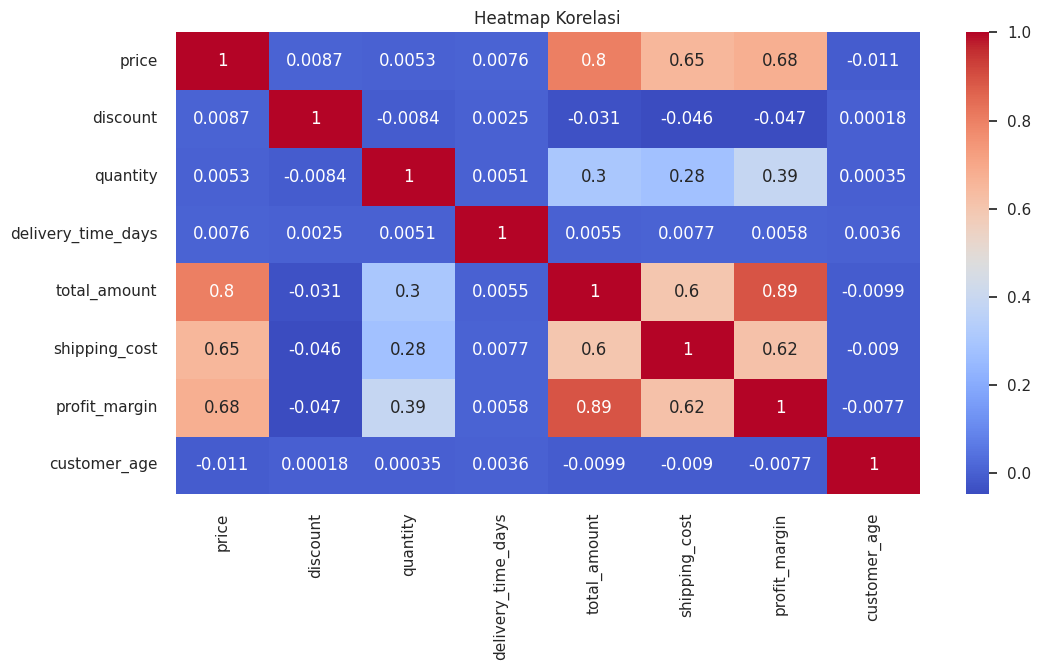

In [ ]:
numeric_feature = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 6))
sns.heatmap(numeric_feature.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi")
plt.show()

##Visualisasi Distribusi semua Kolom Numerik

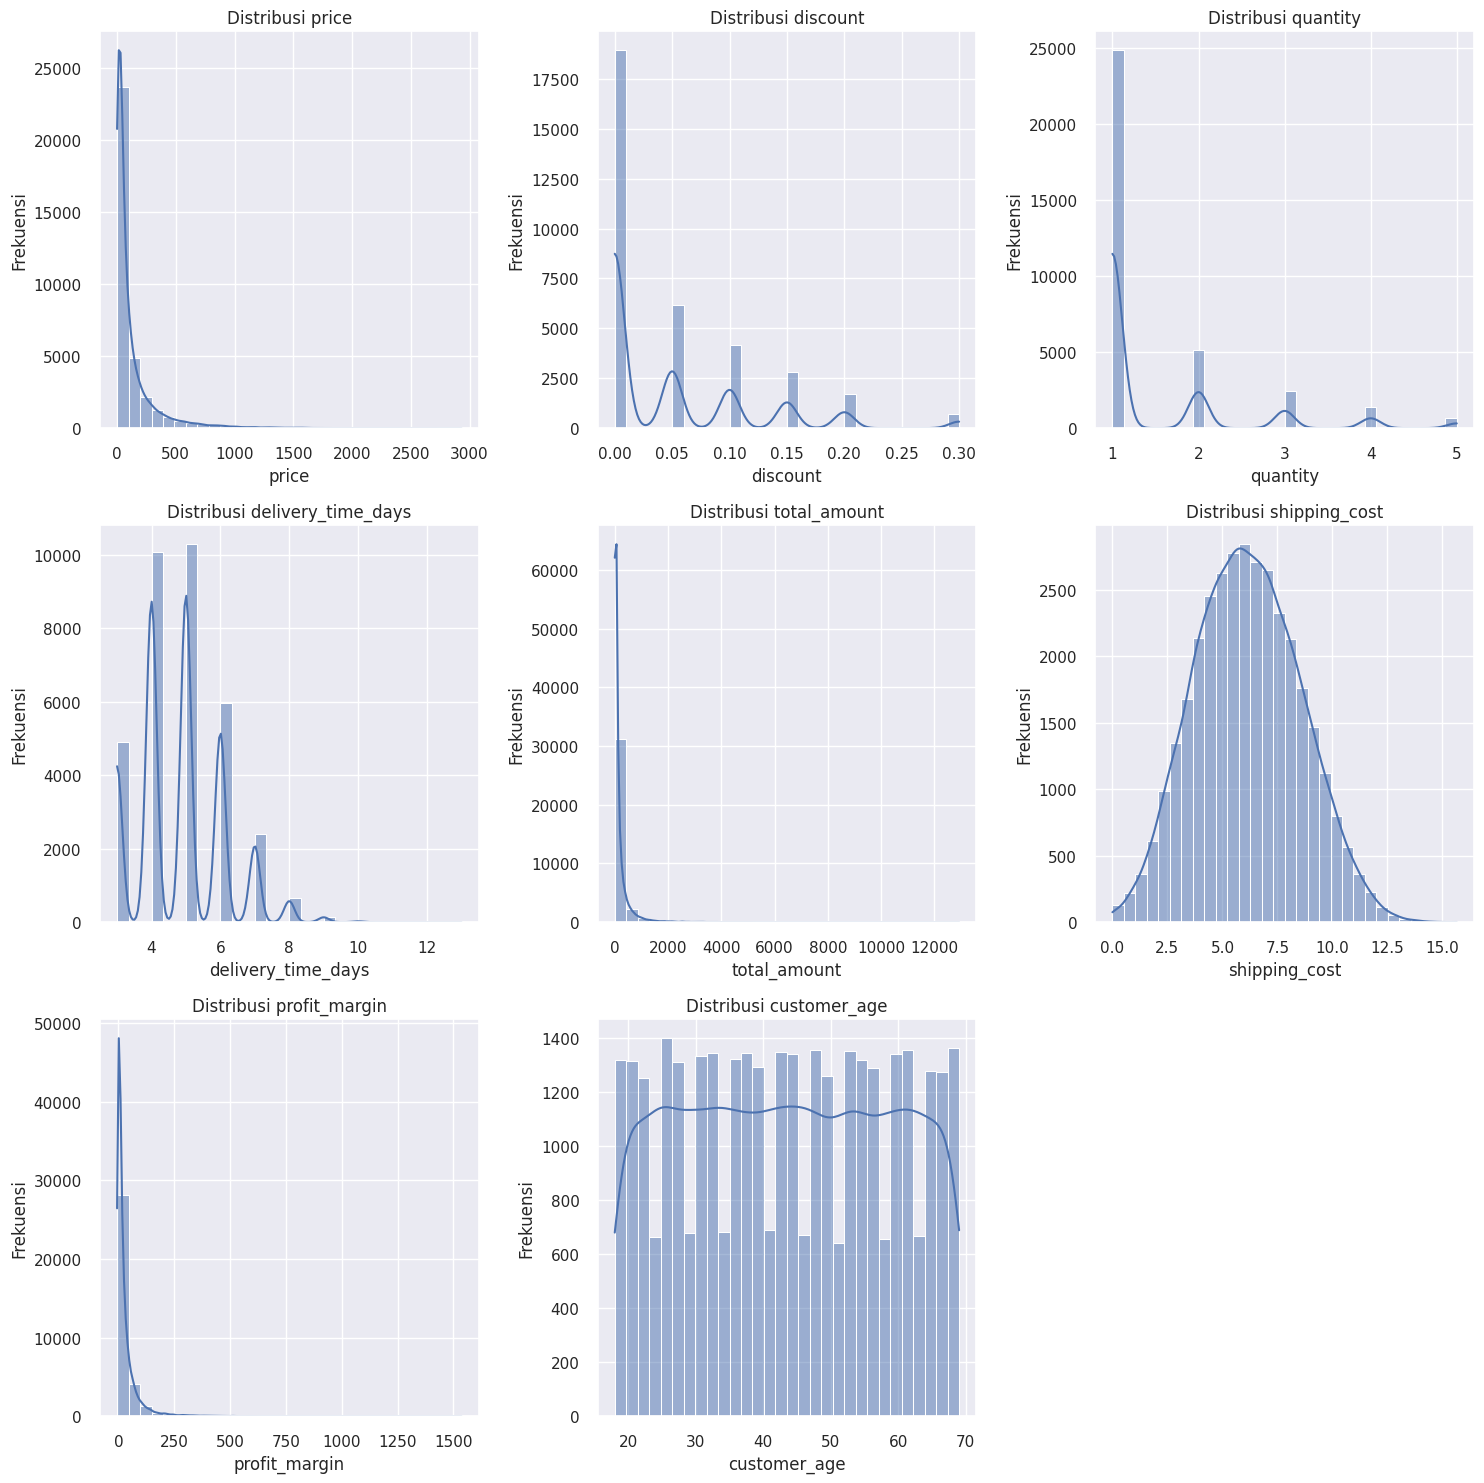

In [ ]:
# Menampilkan histogram untuk semua kolom numerik
numeric_col = df.select_dtypes(include=['float64', 'int64']).columns
categoric_col = df.select_dtypes(include=['object']).columns

num_cols = len(numeric_col)

# Menentukan ukuran grid subplot secara otomatis
rows = (num_cols // 3) + (1 if num_cols % 3 != 0 else 0)
cols = 3

plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(numeric_col):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()


#Data Preparation

##Cleaning

###Cek Informasi Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34500 entries, 0 to 34499
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            34500 non-null  object 
 1   customer_id         34500 non-null  object 
 2   product_id          34500 non-null  object 
 3   category            34500 non-null  object 
 4   price               34500 non-null  float64
 5   discount            34500 non-null  float64
 6   quantity            34500 non-null  int64  
 7   payment_method      34500 non-null  object 
 8   order_date          34500 non-null  object 
 9   delivery_time_days  34500 non-null  int64  
 10  region              34500 non-null  object 
 11  returned            34500 non-null  object 
 12  total_amount        34500 non-null  float64
 13  shipping_cost       34500 non-null  float64
 14  profit_margin       34500 non-null  float64
 15  customer_age        34500 non-null  int64  
 16  cust

###Menghapus kolom yang tidak dipakai

In [ ]:
df_clean = df.drop(columns=['product_id', 'profit_margin'])

###Menghapus Duplikasi Data

In [ ]:
df = df.drop_duplicates()

##Konversi Tipe Tanggal

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

##Membuat Kolom Total Amount

In [ ]:
df['total_amount'] = (df['quantity'] * df['price'] * (1 - df['discount'])) + df['shipping_cost']

##Membuat RFM

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

min_valid_date = df['order_date'].min()

df['order_date_filled'] = df['order_date'].fillna(min_valid_date)

snapshot_date = df['order_date_filled'].max() + pd.Timedelta(days=1)

rfm = df.groupby('customer_id').agg({
    'order_date_filled': 'max',
    'order_id': 'nunique',
    'total_amount': 'sum'
}).reset_index()

rfm.columns = ['customer_id', 'last_purchase', 'Frequency', 'Monetary']

rfm['Recency'] = (snapshot_date - rfm['last_purchase']).dt.days


In [ ]:
df.groupby('customer_id')['order_id'].nunique().describe()

,order_id
count,7903.000000
mean,4.365431
std,2.048718
min,1.000000
25%,3.000000
50%,4.000000
75%,6.000000
max,13.000000


##Pengecekan Outlier

In [ ]:
numeric_col = ['Recency','Frequency','Monetary']

Q1 = rfm[numeric_col].quantile(0.25)
Q3 = rfm[numeric_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\n=== Outlier Detection (Hanya Ditampilkan, Tidak Dihapus) ===")
print("Lower Bound:\n", lower_bound)
print("Upper Bound:\n", upper_bound)


=== Outlier Detection (Hanya Ditampilkan, Tidak Dihapus) ===
Lower Bound:
 Recency     -221.5000
Frequency     -1.5000
Monetary    -922.0405
dtype: float64
Upper Bound:
 Recency       494.5000
Frequency      10.5000
Monetary     2162.5795
dtype: float64


##RFM Scoring

In [ ]:
def safe_qcut(series, labels):
    unique_vals = series.nunique()
    if unique_vals < 2:
        return pd.Series([labels[len(labels)//2]] * len(series))
    bins = min(len(labels), unique_vals)
    return pd.qcut(series.rank(method='first'), q=bins, labels=labels[:bins])

rfm['R_score'] = safe_qcut(rfm['Recency'], labels=[5,4,3,2,1])

rfm['F_score'] = safe_qcut(rfm['Frequency'], labels=[1,2,3,4,5])

rfm['M_score'] = safe_qcut(rfm['Monetary'], labels=[1,2,3,4,5])

##Output RFM

In [ ]:
print("\n=== RFM SCORE SAMPLE ===\n")
print(rfm.head())


=== RFM SCORE SAMPLE ===

  customer_id last_purchase  Frequency   Monetary  Recency R_score F_score  \
0      C10000    2025-09-07          2   223.7645        5       5       1   
1      C10001    2025-03-02          5  3291.5175      194       2       3   
2      C10002    2024-08-07          5   247.8745      401       1       3   
3      C10003    2025-07-02          3   171.0160       72       4       1   
4      C10004    2024-01-21          3   739.5300      600       1       1   

  M_score  
0       2  
1       5  
2       2  
3       1  
4       4  


##Visualisasi Boxplot RFM

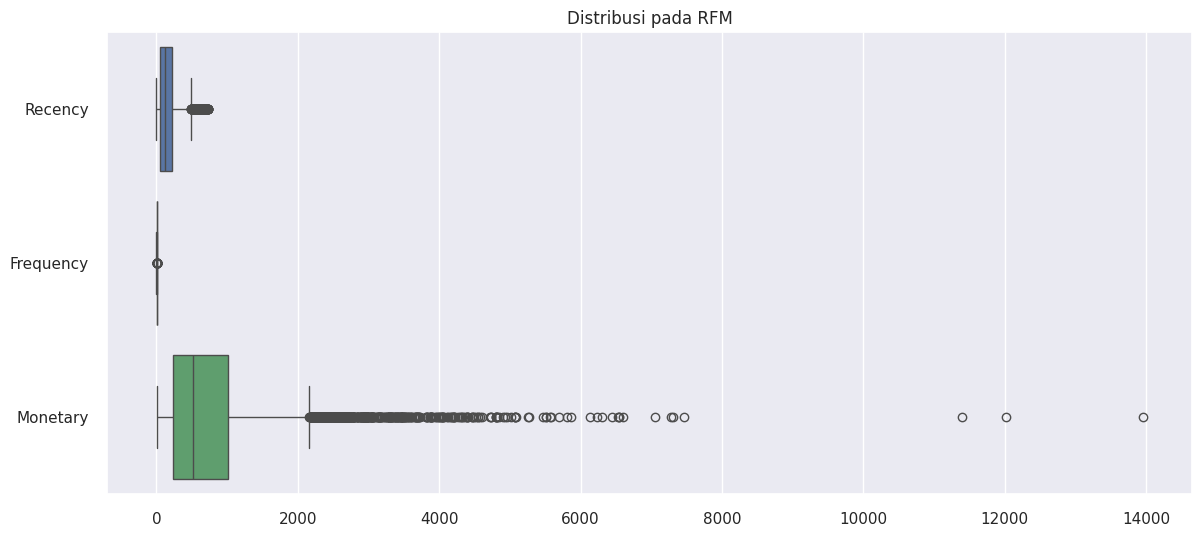

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(data=rfm[numeric_col], orient='h')
plt.title("Distribusi pada RFM")
plt.show()

#Modelling

##Persiapan data untuk Clustering

In [ ]:
X = rfm[['Recency','Frequency','Monetary']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##Menentukan Jumlah Cluster dengan Silhouette Score

In [ ]:
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sil_score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(sil_score)
    print(f"K={k} → Silhouette Score = {sil_score:.4f}")

K=2 → Silhouette Score = 0.3227
K=3 → Silhouette Score = 0.3482
K=4 → Silhouette Score = 0.3381
K=5 → Silhouette Score = 0.3052
K=6 → Silhouette Score = 0.2889
K=7 → Silhouette Score = 0.2992
K=8 → Silhouette Score = 0.2990
K=9 → Silhouette Score = 0.2675
K=10 → Silhouette Score = 0.2738


##Menentukan Cluster Terbaik

In [ ]:
best_k = cluster_range[silhouette_scores.index(max(silhouette_scores))]

print("\n===================================================")
print(f"Jumlah cluster terbaik berdasarkan Silhouette = {best_k}")
print("===================================================")


Jumlah cluster terbaik berdasarkan Silhouette = 3


##Train Final Model dan Menghasilkan Cluster

In [ ]:
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
rfm['Cluster'] = kmeans_final.fit_predict(X_scaled)

print("\n=== RFM + CLUSTERING RESULT ===")
print(rfm.head())


=== RFM + CLUSTERING RESULT ===
  customer_id last_purchase  Frequency   Monetary  Recency R_score F_score  \
0      C10000    2025-09-07          2   223.7645        5       5       1   
1      C10001    2025-03-02          5  3291.5175      194       2       3   
2      C10002    2024-08-07          5   247.8745      401       1       3   
3      C10003    2025-07-02          3   171.0160       72       4       1   
4      C10004    2024-01-21          3   739.5300      600       1       1   

  M_score  Cluster  
0       2        0  
1       5        2  
2       2        1  
3       1        0  
4       4        1  


#Evaluation

##Evaluasi Visualisasi Elbow Curve

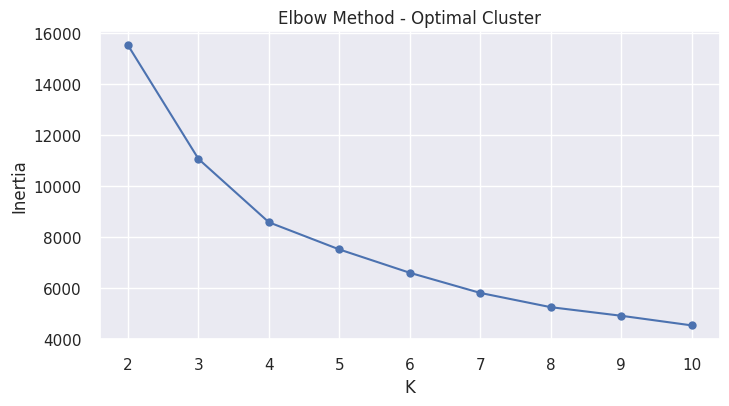

In [ ]:
inertia = []
for k in cluster_range:
    km = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,4))
plt.plot(cluster_range, inertia, marker='o')
plt.title("Elbow Method - Optimal Cluster")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

##Evaluasi Visualisasi Silhouette Score Plot

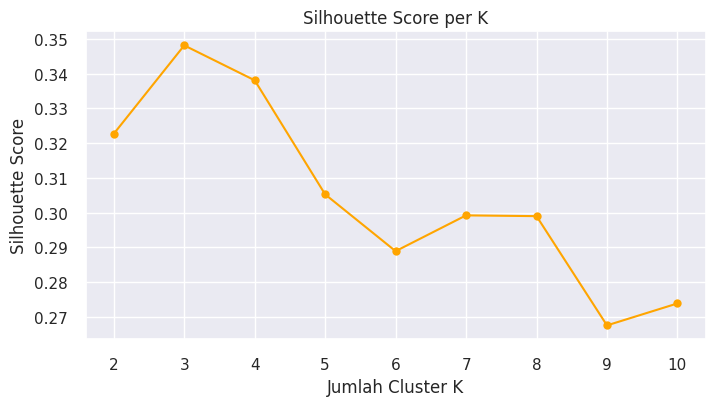

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in cluster_range:
    km = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    labels = km.labels_
    sil = silhouette_score(X_scaled, labels)
    silhouette_scores.append(sil)

# **Silhouette Score Plot**
plt.figure(figsize=(8,4))
plt.plot(cluster_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score per K')
plt.xlabel('Jumlah Cluster K')
plt.ylabel('Silhouette Score')
plt.show()

#Visualisasi Cluster: Recency vs Monetary

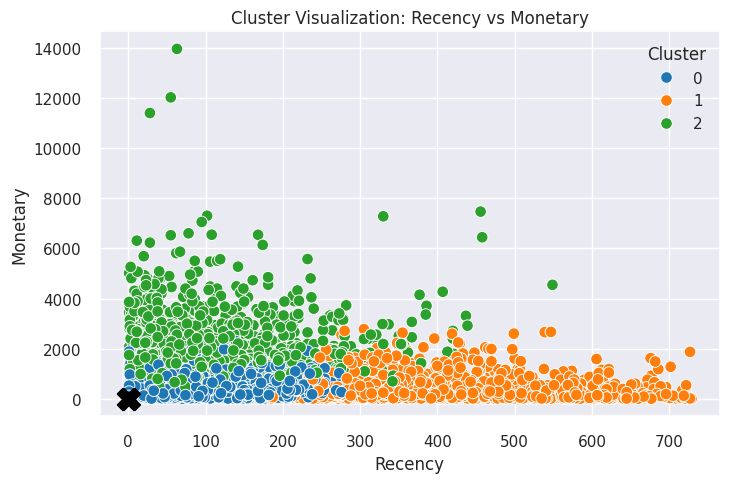

In [ ]:
centroids = kmeans_final.cluster_centers_

# Recency vs Monetary
plt.figure(figsize=(8,5))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='tab10', s=70)
plt.scatter(centroids[:,0],centroids[:,2], c='black', s=250, marker='X')
plt.title("Cluster Visualization: Recency vs Monetary")
plt.show()

##Visualisasi Cluster: Frequency vs Monetary

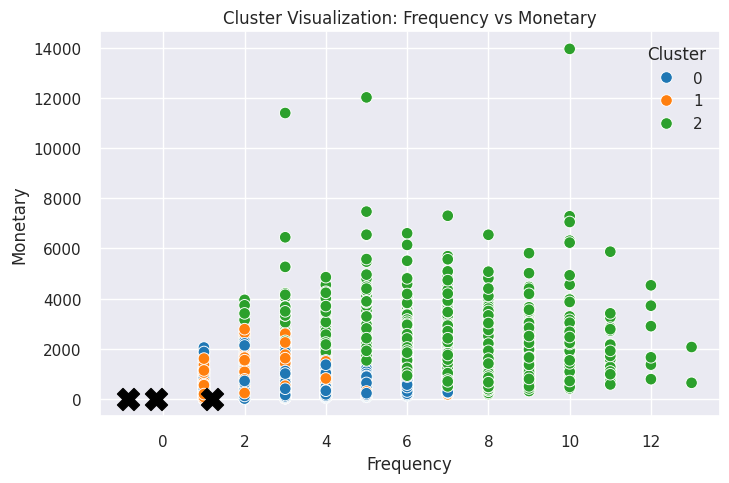

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster', palette='tab10', s=70)
plt.scatter(centroids[:,1],centroids[:,2], c='black', s=250, marker='X')
plt.title("Cluster Visualization: Frequency vs Monetary")
plt.show()

##Visualisasi Cluster: Recency vs Frequency

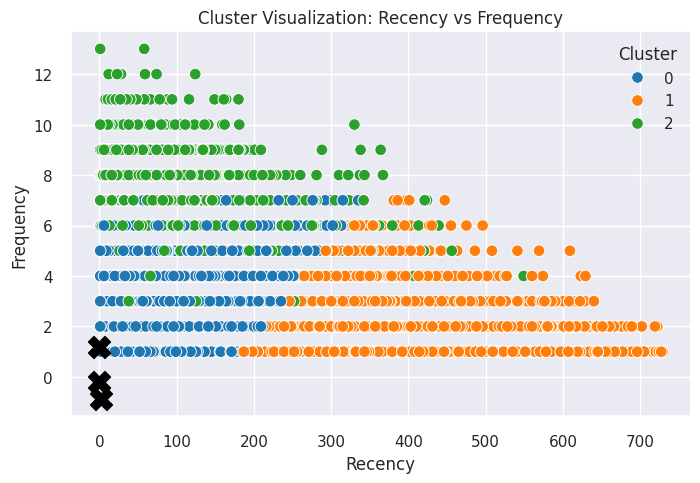

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Cluster', palette='tab10', s=70)
plt.scatter(centroids[:,0],centroids[:,1], c='black', s=250, marker='X')
plt.title("Cluster Visualization: Recency vs Frequency")
plt.show()

##RFM Mean, Normalisasi & Radar Chart

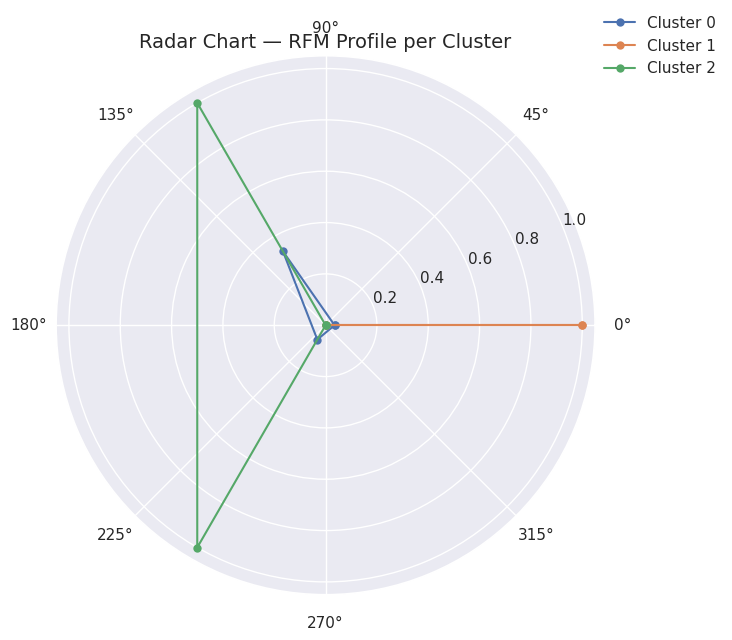

In [ ]:
cluster_mean = rfm.groupby('Cluster')[['Recency','Frequency','Monetary']].mean()

# Normalisasi agar skala sama
cluster_norm = (cluster_mean - cluster_mean.min()) / (cluster_mean.max() - cluster_mean.min())

labels = cluster_norm.columns
num_vars = len(labels)

plt.figure(figsize=(10,7))

for cluster in cluster_norm.index:
    angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
    stats = cluster_norm.loc[cluster].values.tolist()
    stats += stats[:1]
    angles += angles[:1]

    plt.polar(angles, stats, marker='o', label=f'Cluster {cluster}')

plt.title("Radar Chart — RFM Profile per Cluster", fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.1))
plt.show()

##Visualisasi Persebaran Jumlah Customer per Cluster

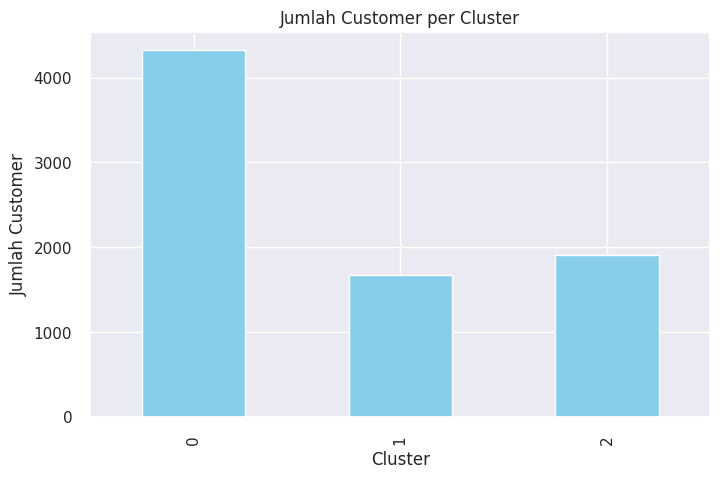

In [ ]:
plt.figure(figsize=(8,5))
rfm['Cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Jumlah Customer per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")
plt.show()


##Visualisasi Distribusi Gender menggunakan Pie Chart

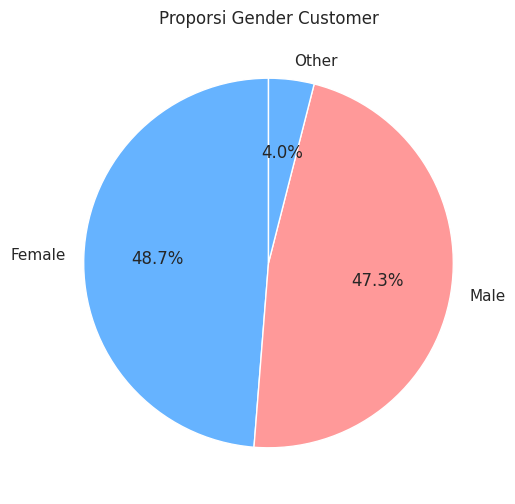

In [ ]:
plt.figure(figsize=(6,6))
df['customer_gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title("Proporsi Gender Customer")
plt.ylabel("")
plt.show()

##Visualisasi Distribusi Gender per Cluster

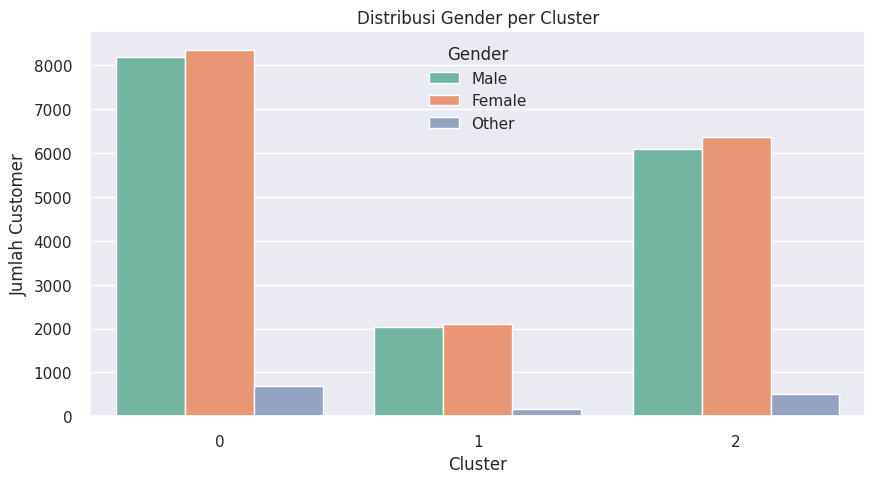

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=rfm.merge(df[['customer_id','customer_gender']], on='customer_id'),
              x='Cluster', hue='customer_gender', palette='Set2')
plt.title("Distribusi Gender per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")
plt.legend(title="Gender")
plt.show()

##Density Plot Usia berdasarkan Gender

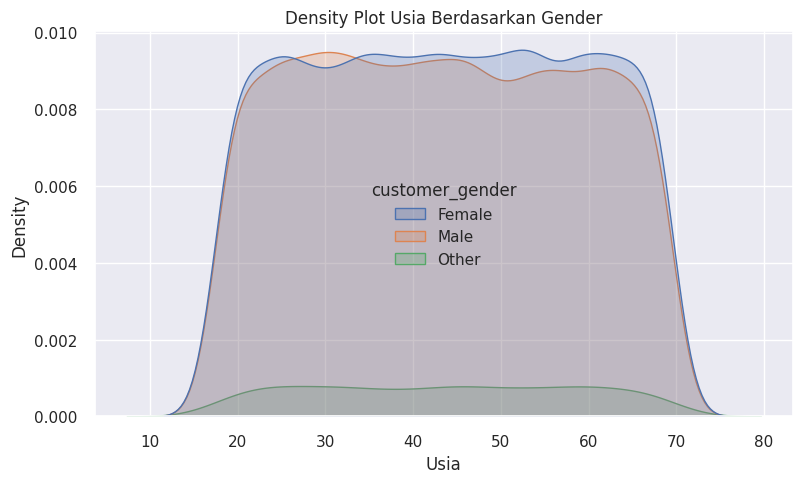

In [ ]:
plt.figure(figsize=(9,5))
sns.kdeplot(data=df, x='customer_age', hue='customer_gender', fill=True)
plt.title("Density Plot Usia Berdasarkan Gender")
plt.xlabel("Usia")
plt.show()


##Age Grouping

In [ ]:
def age_group(age):
    if age < 25:
        return "Youth (<25)"
    elif 25 <= age <= 40:
        return "Adult (25-40)"
    elif 41 <= age <= 60:
        return "Middle Age (41-60)"
    else:
        return "Senior (>60)"

# GANTI age → customer_age
df['age_group'] = df['customer_age'].apply(age_group)

# Ambil data demografis unik per customer
demo = df[['customer_id', 'age_group']].drop_duplicates()

# Merge dengan RFM
rfm_demo = rfm.merge(demo, on='customer_id', how='left')


##Heatmap Demografi

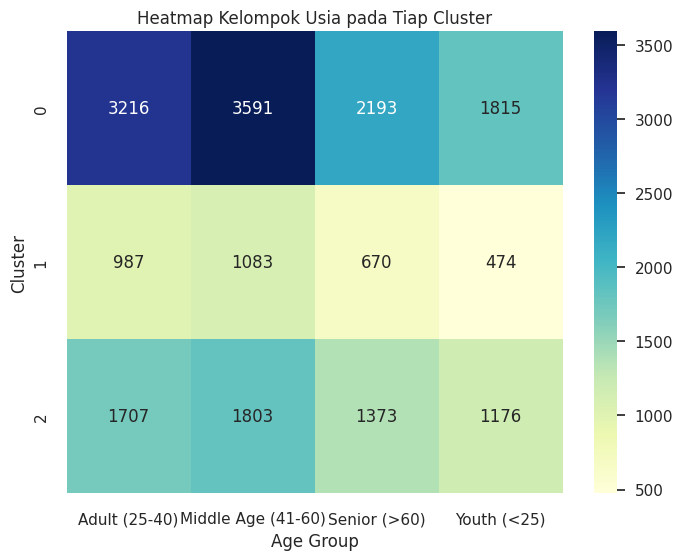

In [ ]:
demo_summary = rfm_demo.groupby(['Cluster', 'age_group']).size().unstack(fill_value=0)

plt.figure(figsize=(8,6))
sns.heatmap(demo_summary, annot=True, fmt='g', cmap='YlGnBu')
plt.title("Heatmap Kelompok Usia pada Tiap Cluster")
plt.xlabel("Age Group")
plt.ylabel("Cluster")
plt.show()

##Visualisasi Kategori Barang Paling Banyak Dibeli per Cluster

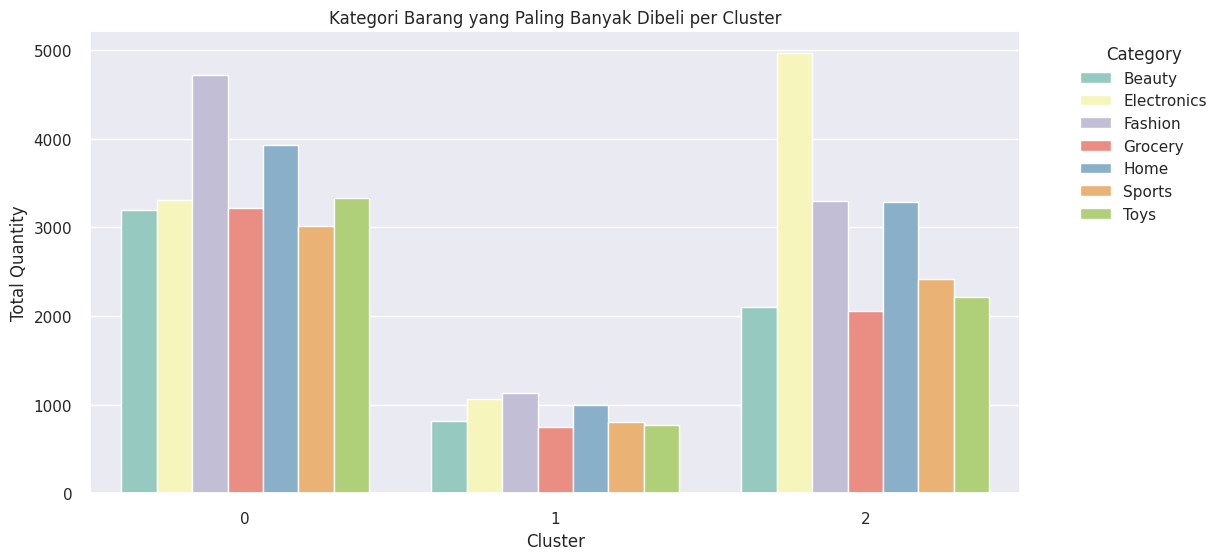

In [ ]:
df_clustered = df.merge(rfm[['customer_id','Cluster']], on='customer_id')

cluster_category = df_clustered.groupby(['Cluster','category'])['quantity'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=cluster_category, x="Cluster", y="quantity", hue="category", palette="Set3")
plt.title("Kategori Barang yang Paling Banyak Dibeli per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Total Quantity")
plt.legend(title="Category", bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

##Visualisasi Pie Chart Persentase Metode Pembayaran

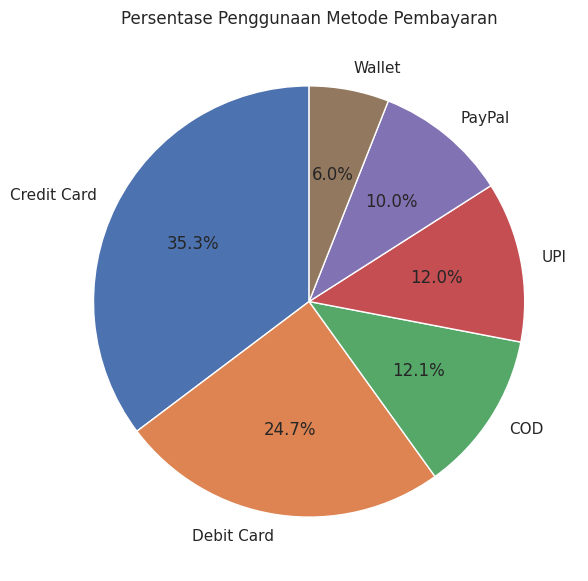

In [ ]:
plt.figure(figsize=(7,7))
df['payment_method'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Persentase Penggunaan Metode Pembayaran")
plt.ylabel("")
plt.show()

##Visualisasi Metode Pembayaran Berdasarkan Cluster RFM

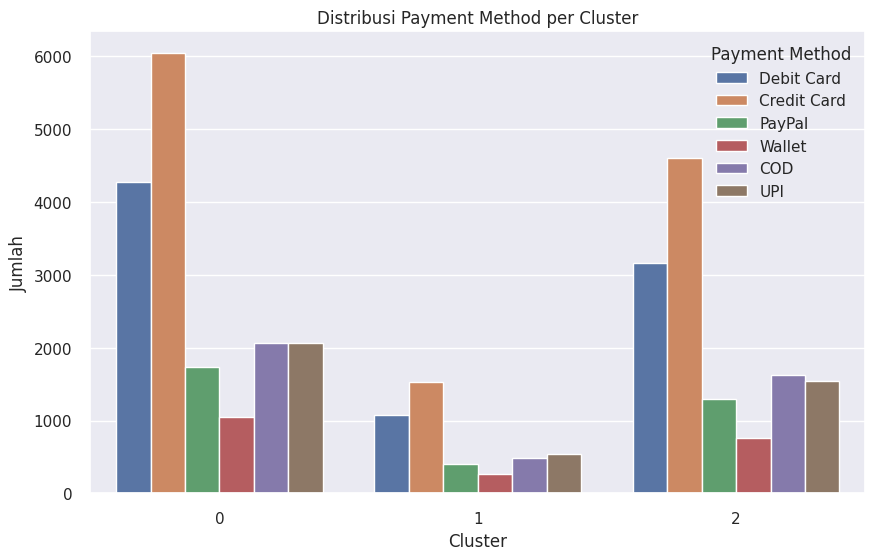

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=rfm.merge(df[['customer_id','payment_method']], on='customer_id'),
              x='Cluster', hue='payment_method')
plt.title("Distribusi Payment Method per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah")
plt.legend(title="Payment Method")
plt.show()

##RFM Summary per Cluster

In [ ]:
rfm_cluster_summary = rfm.groupby('Cluster')[['Recency','Frequency','Monetary']].mean().round(2)

print("\n===== RFM PROFILE PER CLUSTER =====\n")
display(rfm_cluster_summary)


===== RFM PROFILE PER CLUSTER =====



,Recency,Frequency,Monetary
Cluster,,,
0,100.60,3.98,486.45
1,389.14,2.58,400.73
2,90.15,6.80,1730.52


##Mapping Nama Cluster

In [ ]:
cluster_persona = {
    0: "Low-Value Hibernating Customers",
    1: "New or Dormant Low Spenders",
    2: "Premium Loyal Buyers"
}

##Menambahkan Kolom Persona ke Dataframe RFM

In [ ]:
# Menambahkan kolom persona ke dataframe RFM
rfm["Segment_Persona"] = rfm["Cluster"].map(cluster_persona)

# Menampilkan beberapa baris untuk verifikasi
rfm.head()


,customer_id,last_purchase,Frequency,Monetary,Recency,R_score,F_score,M_score,Cluster,Segment_Persona
0,C10000,2025-09-07,2,223.7645,5,5,1,2,0,Low-Value Hibernating Customers
1,C10001,2025-03-02,5,3291.5175,194,2,3,5,2,Premium Loyal Buyers
2,C10002,2024-08-07,5,247.8745,401,1,3,2,1,New or Dormant Low Spenders
3,C10003,2025-07-02,3,171.0160,72,4,1,1,0,Low-Value Hibernating Customers
4,C10004,2024-01-21,3,739.5300,600,1,1,4,1,New or Dormant Low Spenders


##Membuat Profil Segmentasi Per Cluster

In [ ]:
# Profil RFM per Cluster
rfm_segment_summary = (
    rfm.groupby("Cluster")[["Recency", "Frequency", "Monetary"]]
    .mean()
    .round(2)
    .reset_index()
)

# Menambahkan nama persona
rfm_segment_summary["Segment_Persona"] = rfm_segment_summary["Cluster"].map(cluster_persona)

rfm_segment_summary

,Cluster,Recency,Frequency,Monetary,Segment_Persona
0,0,100.60,3.98,486.45,Low-Value Hibernating Customers
1,1,389.14,2.58,400.73,New or Dormant Low Spenders
2,2,90.15,6.80,1730.52,Premium Loyal Buyers


##Menampilkan Segmentasi Lengkap

In [ ]:
for c in sorted(rfm_segment_summary['Cluster']):
    seg = cluster_persona[c]
    rec = rfm_segment_summary.loc[rfm_segment_summary['Cluster'] == c, 'Recency'].values[0]
    freq = rfm_segment_summary.loc[rfm_segment_summary['Cluster'] == c, 'Frequency'].values[0]
    mon = rfm_segment_summary.loc[rfm_segment_summary['Cluster'] == c, 'Monetary'].values[0]

    print(f"\n=== Cluster {c}: {seg} ===")
    print(f"Recency  : {rec}")
    print(f"Frequency: {freq}")
    print(f"Monetary : {mon}")


=== Cluster 0: Low-Value Hibernating Customers ===
Recency  : 100.6
Frequency: 3.98
Monetary : 486.45

=== Cluster 1: New or Dormant Low Spenders ===
Recency  : 389.14
Frequency: 2.58
Monetary : 400.73

=== Cluster 2: Premium Loyal Buyers ===
Recency  : 90.15
Frequency: 6.8
Monetary : 1730.52


##Analisis tiap Cluster

### 1. Cluster 0 ( Low-Value Hibernating Customers )

#### RFM Insight :

 * Recency : 100.60
 * Frequency : 3.98
 * Monetary : 486.45

#### Profil Singkat :

Cluster ini berisi pelanggan yang memiliki nilai transaksi rendah hingga menengah, namun dengan aktivitas yang sudah menurun. Meski frekuensi pembeliannya tidak terlalu rendah, nilai belanja rata-ratanya masih masuk kategori low-to-mid. Recency yang cukup tinggi menunjukkan bahwa mereka sudah lama tidak kembali melakukan pembelian.

Pelanggan seperti ini umumnya memiliki motivasi belanja yang tidak tinggi, kemungkinan besar mereka hanya membeli ketika ada kebutuhan khusus atau ketika ada promo menarik. Secara bisnis, mereka masih bisa diaktifkan kembali, namun bukan segmen prioritas dalam peningkatan revenue besar.

#### Strategi :

 Reactivation Campaign dengan promo ringan, misalnya voucher 10–20% atau gratis ongkir terbatas.
 Reminder berbasis kebutuhan, seperti rekomendasi produk yang pernah dibeli atau produk serupa.
 Gunakan trigger urgency, contoh: “Promo berakhir 12 jam lagi”.
 Bundle hemat, misalnya paket kecil yang meningkatkan perceived value namun tetap murah.

---

### 2. Cluster 1 ( New or Dormant Low Spenders )

#### RFM Insight :

 * Recency : 389.14
 * Frequency : 2.58
 * Monetary : 400.73

#### Profil Singkat :

Cluster ini memiliki karakter pelanggan baru atau pelanggan lama yang sudah tidak aktif, dengan nilai transaksi yang relatif rendah. Frekuensi belanja mereka masih di bawah rata-rata dan Monetary juga menunjukkan bahwa mereka bukan spender besar.

Mereka kemungkinan masih dalam fase mencoba platform, belum loyal, atau hanya membeli produk-produk harga terjangkau. Mereka termasuk segmen yang bisa dikembangkan, karena walaupun nilainya rendah, mereka tidak benar-benar hibernating.

#### Strategi :

 Onboarding Campaign (untuk pelanggan baru), seperti tutorial penggunaan aplikasi, rekomendasi produk, atau voucher selamat datang.
 Upsell ringan seperti rekomendasi produk yang sedikit lebih mahal dengan benefit tambahan.
 Promo kategori populer, misalnya fashion, kosmetik, atau kebutuhan harian dengan potongan harga kecil.
 Program loyalitas sederhana, misalnya poin reward untuk transaksi pertama hingga ketiga.

---

### 3. Cluster 2 ( Premium Loyal Buyers )

#### RFM Insight :

 * Recency : 90.15
 * Frequency : 6.80
 * Monetary : 1730.52

#### Profil Singkat :

Ini adalah segmen terbaik dalam keseluruhan dataset: pelanggan premium dan loyal. Mereka memiliki frekuensi belanja tertinggi, nilai transaksi terbesar, dan Recency yang rendah (artinya baru-baru ini bertransaksi). Mereka adalah pelanggan utama dan berkontribusi besar pada pendapatan.

Segmen ini biasanya membeli produk dengan harga menengah hingga premium, dan mereka memiliki engagement tinggi pada platform. Mereka adalah pelanggan yang harus dipertahankan dengan prioritas tertinggi.

#### Strategi :

 Eksklusivitas → akses early bird untuk promo, produk baru, atau pre-order.
 Loyalty Program premium, seperti cashback khusus, poin ganda, atau membership tingkat atas.
 Personalized recommendation berdasarkan riwayat pembelian dan kategori yang sering mereka beli.
 Premium customer care → respons lebih cepat, voucher eksklusif, dan layanan after-sales.
 Bundle premium untuk meningkatkan basket size.